## Code used for Taylor et al. (2024)
### 'Canyon-fills in unprecidented detail: The importance of multiple flow processes in thin-bedded confined overbank successions'

In [1]:
# Import packages

import numpy as np
import pandas as pd 
import plotly.express as px
import plotly.graph_objects as go
import matplotlib as mpl
import matplotlib.pyplot as plt
import seaborn as sns
from pywaffle import Waffle
import statsmodels.api as sm
from statsmodels.stats.weightstats import DescrStatsW
%config InlineBackend.figure_format='retina'
sns.set_style('ticks')


In [2]:
# Load data

df=pd.read_csv('data/pb_beds_fa.csv')



In [3]:
# Grain-size 

gs_num_dict = {
    'm':1,
    'vfsi':2,
    'fsi':3,
    'csi':4,
    'vfs':5,
    'fs':6,
    'ms':7,
    'cs':8,
    'vcs':9,
    'gr':10,
#     None: 0
}

gs_phi_dict = {
    'm':8.0,
    'vfsi':7.0,
    'fsi':6.0,
    'csi':4.0,
    'vfs':3.0,
    'fs':2.0,
    'ms':1.0,
    'cs':0.0,
    'vcs':-1.0,
    'gr':-2.0,
#     None: 0
}

df['gs_base_num'] = df['gs_base'].replace(gs_num_dict)
df['gs_top_num'] = df['gs_top'].replace(gs_num_dict)

df[['gs_base_num','gs_top_num']] = df[['gs_base_num','gs_top_num']].apply(pd.to_numeric, errors='coerce')

df['gs_min'] = df[['gs_base_num', 'gs_top_num']].max(axis=1)
df['gs_max'] = df[['gs_base_num', 'gs_top_num']].min(axis=1)

In [4]:
# Data filtering 

# Get facies associations 

margin = df[df.FA_name == 'margin'] 
lower_overbank = df[df.FA_name == 'lower_overbank']  
upper_overbank = df[df.FA_name == 'upper_overbank']
overbank = df[(df["FA_number"] == 3) | (df["FA_number"] == 4)]

# Get sand bed thickness

sand_th = df[(df["sand/mud"] == 's')]
mud_th = df[(df["sand/mud"] == 'm')]
upper_overbank_sand_beds = upper_overbank[(upper_overbank["sand/mud"] == 's')]
lower_overbank_sand_beds = lower_overbank[(lower_overbank["sand/mud"] == 's')]
#order 




In [5]:
upper_overbank_sand_beds.head()

,log,FA_name,FA_number,area,marker bed,bed_number,bed_thickness,sand/mud,gs_base,gs_top,event_th,sand_proportion,Unnamed: 12,Unnamed: 13,gs_base_num,gs_top_num,gs_min,gs_max
0,PBO2a,upper_overbank,4,proximal,NaN,1,30.0,s,cs,csi,NaN,NaN,NaN,NaN,8.0,4.0,8.0,4.0
2,PBO2a,upper_overbank,4,proximal,NaN,3,1.5,s,fs,fs,NaN,NaN,NaN,NaN,6.0,6.0,6.0,6.0
4,PBO2a,upper_overbank,4,proximal,NaN,5,4.0,s,fs,fs,NaN,NaN,NaN,NaN,6.0,6.0,6.0,6.0
6,PBO2a,upper_overbank,4,proximal,NaN,7,4.0,s,fs,fs,NaN,NaN,NaN,NaN,6.0,6.0,6.0,6.0
8,PBO2a,upper_overbank,4,proximal,NaN,9,3.0,s,fs,fs,NaN,NaN,NaN,NaN,6.0,6.0,6.0,6.0


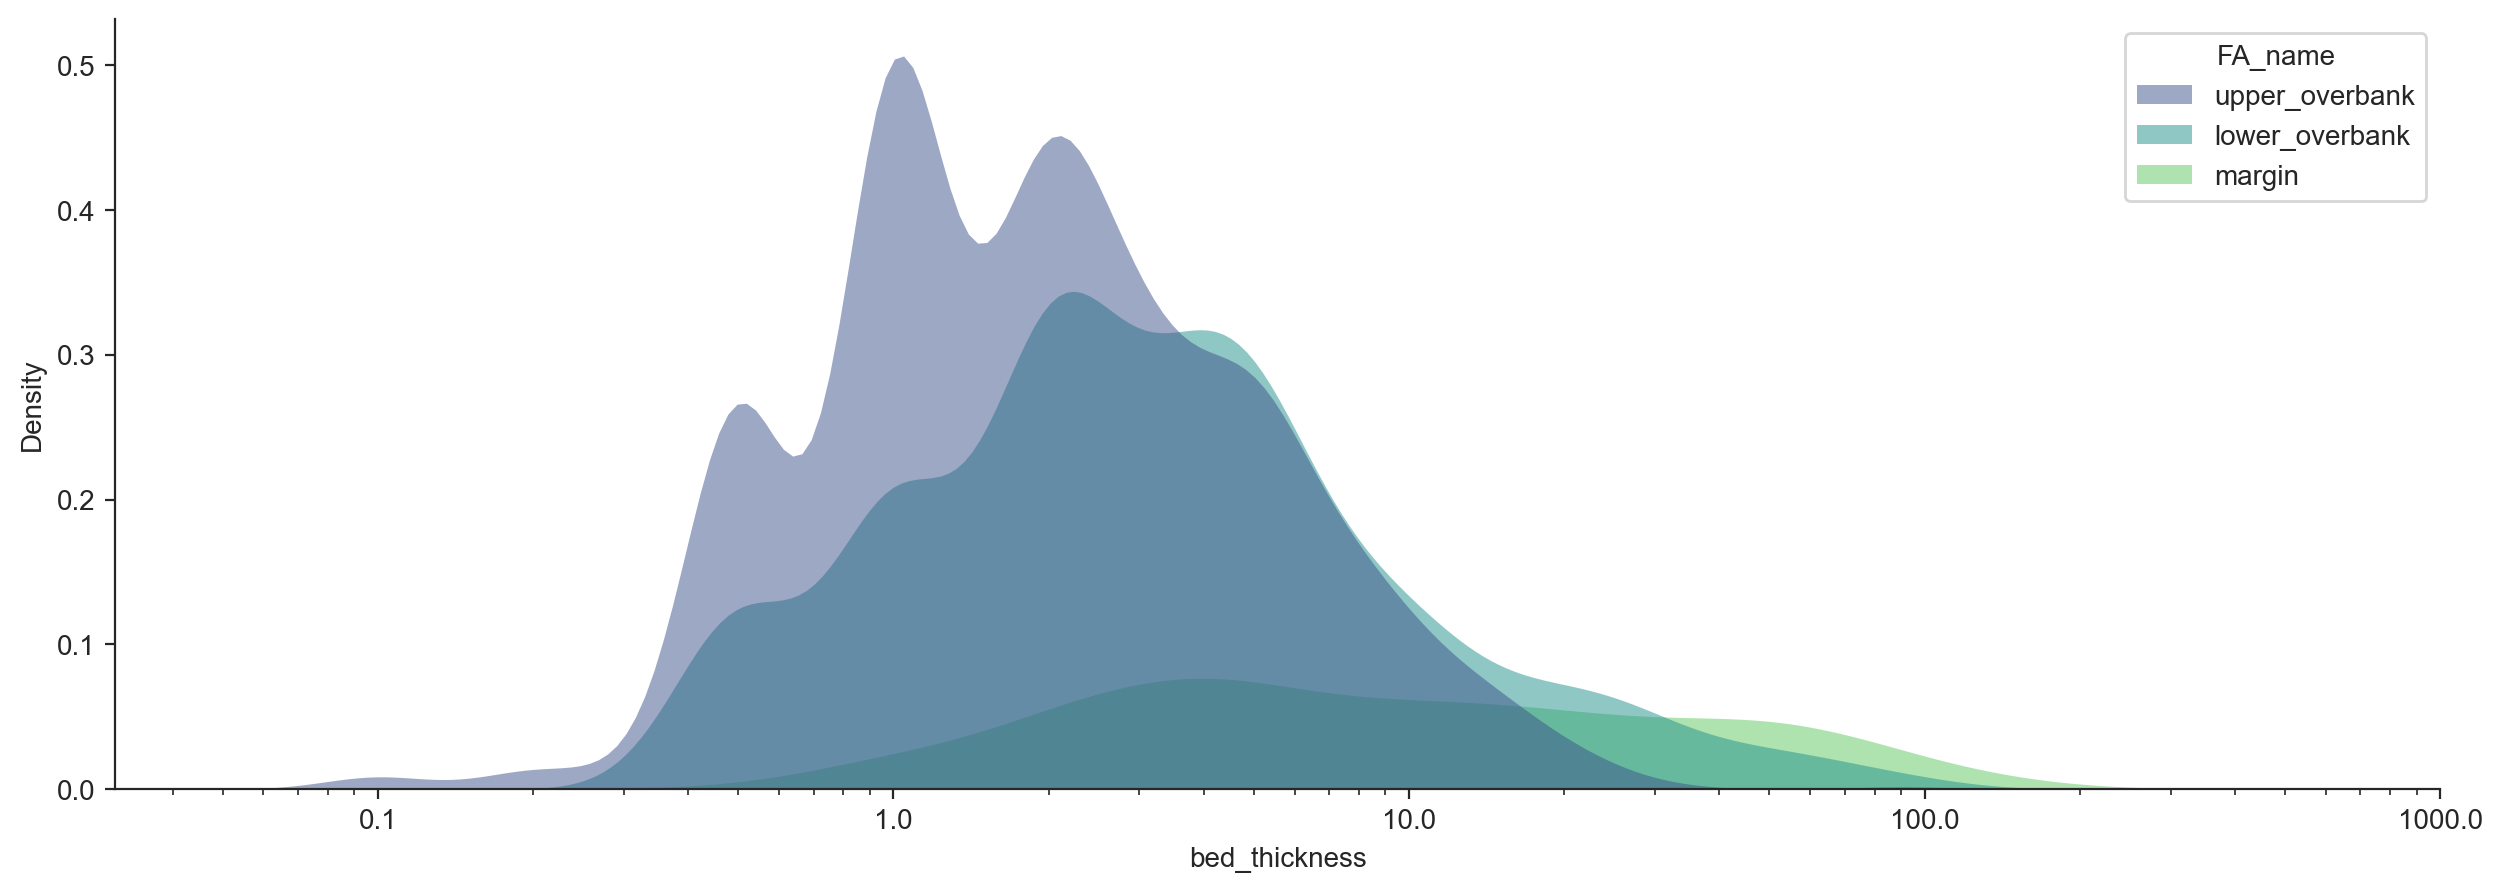

In [6]:
# All beds distribution - histogram 
f, ax = plt.subplots(figsize=(15, 5))
sns.despine(f)
sns.kdeplot(df, x="bed_thickness", hue='FA_name', common_norm=True, log_scale=True, fill=True, palette='viridis', alpha=.5, linewidth=0)
ax.xaxis.set_major_formatter(mpl.ticker.ScalarFormatter())
ax.set_xticks([0.1, 1, 10, 100, 1000])

<Axes: xlabel='bed_thickness', ylabel='Density'>

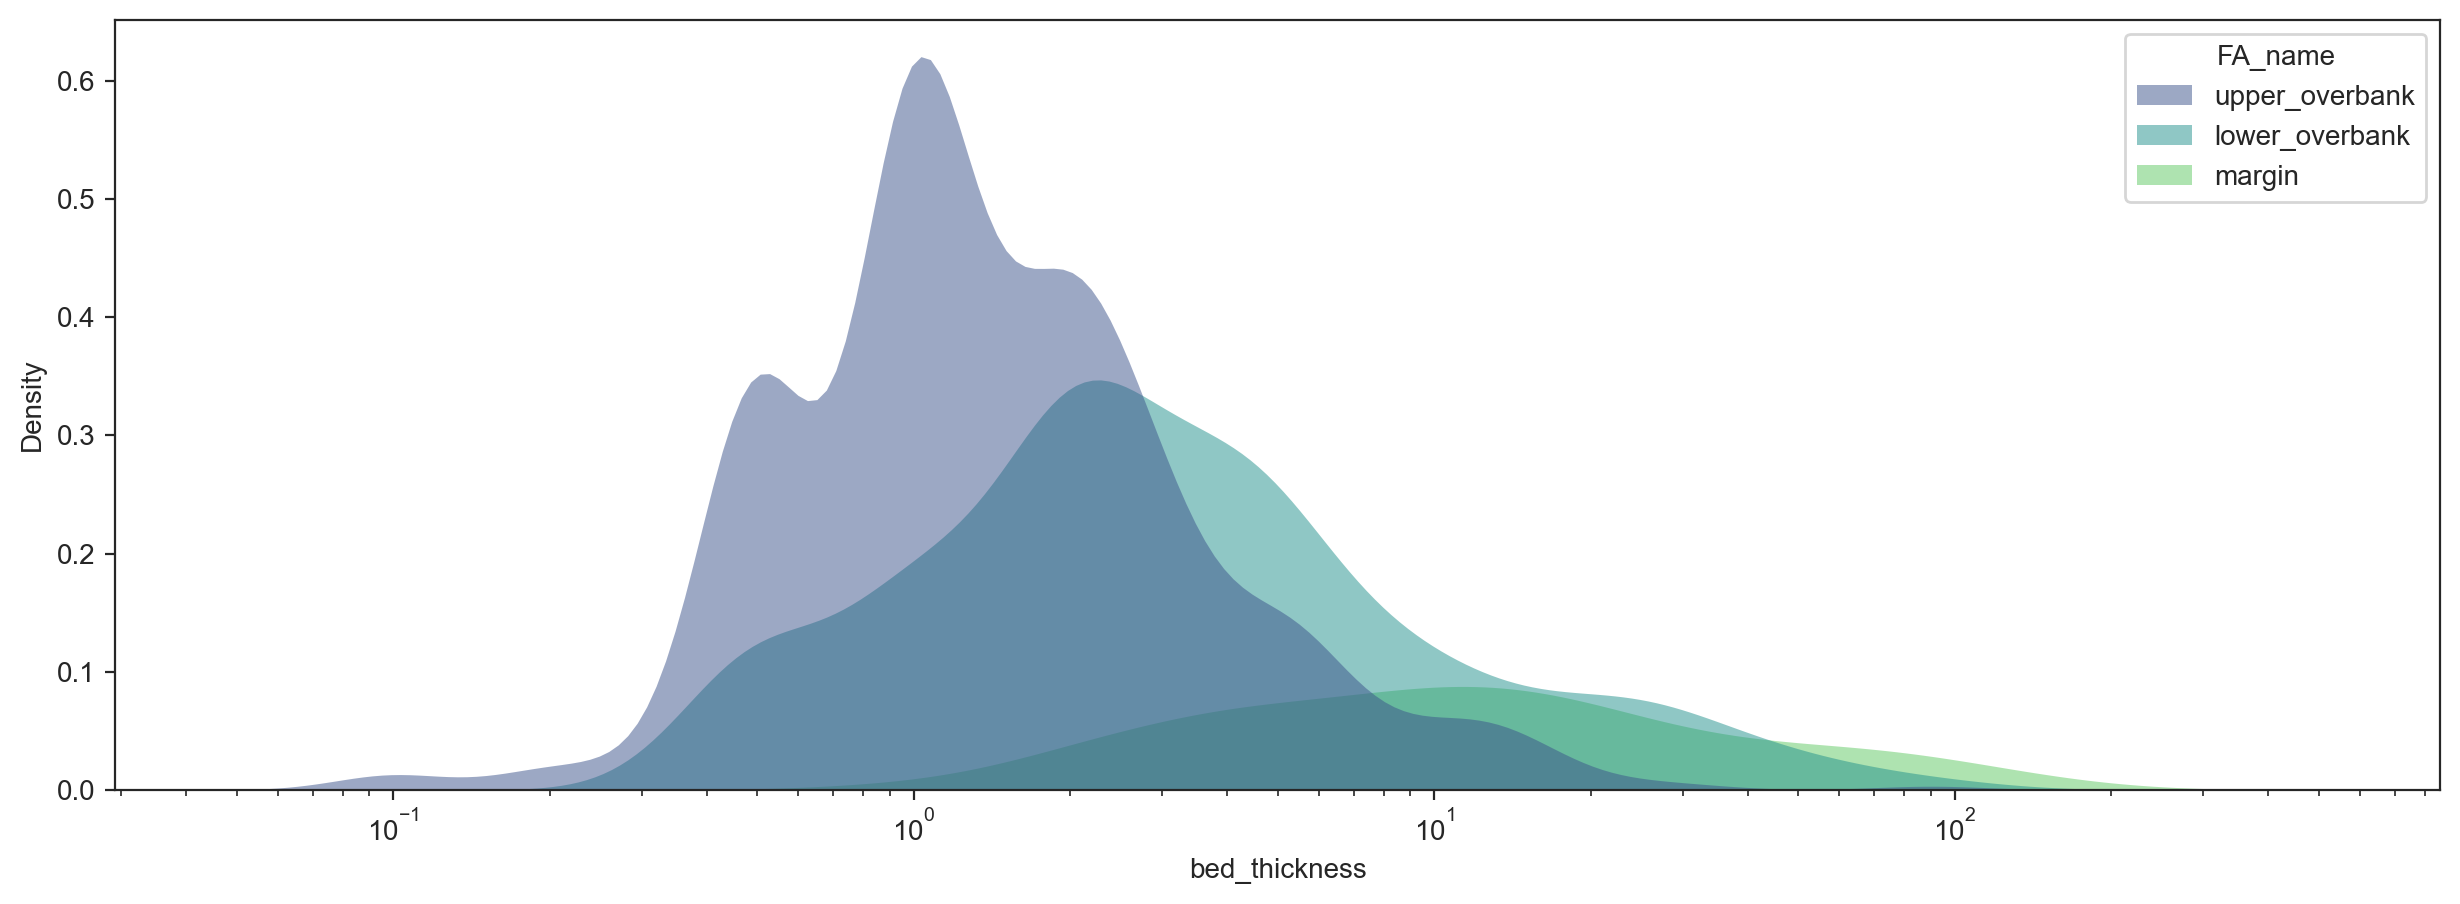

In [7]:
# Sand beds distribution - histogram
plt.figure(figsize=(15,5))
sns.kdeplot(sand_th, x="bed_thickness", hue='FA_name', common_norm=True, log_scale=True, fill=True, palette='viridis', alpha=.5, linewidth=0, )


<Axes: xlabel='event_th', ylabel='Density'>

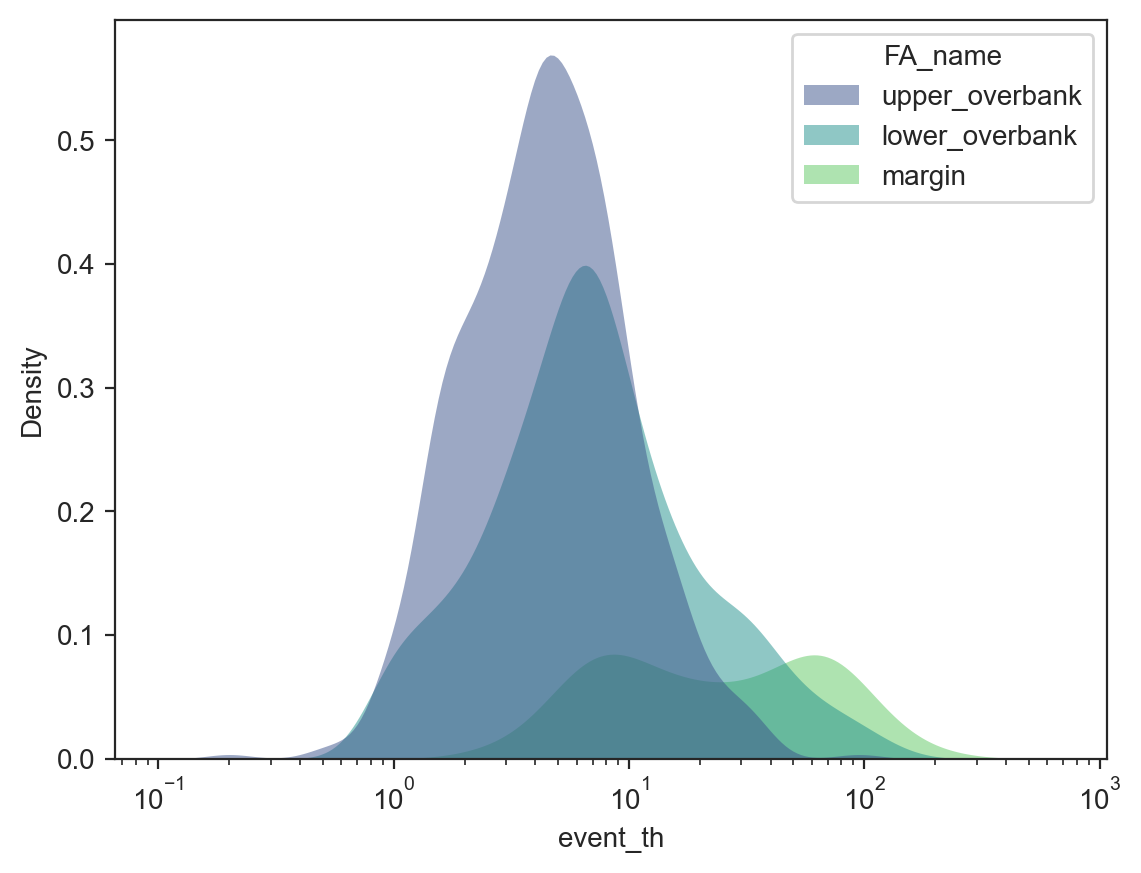

In [8]:
# Event beds distribution - histogram

fig, ax = plt.subplots()
sns.kdeplot(df, x="event_th", hue='FA_name', common_norm=True, log_scale=True, ax=ax, fill=True, palette='viridis', alpha=.5, linewidth=0, )


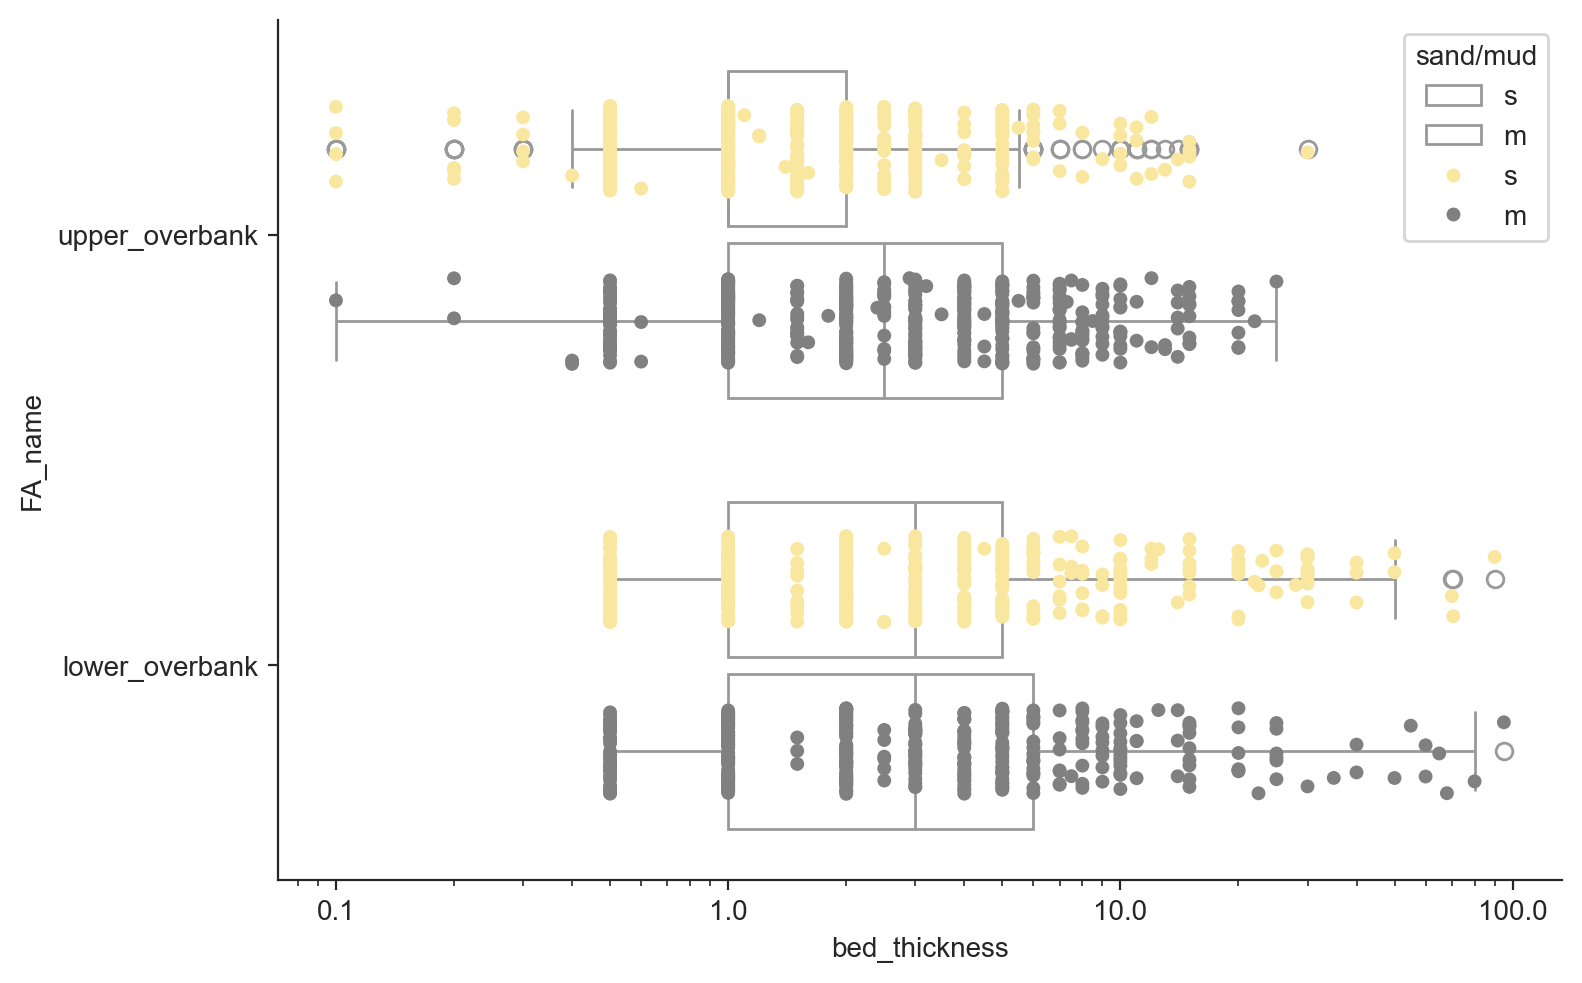

In [9]:
# All beds distribution - box plot
fig, ax = plt.subplots(figsize=(8, 5))

sns.despine(fig)
sns.boxplot(overbank, x="bed_thickness", y="FA_name", log_scale=True, hue="sand/mud",
                 gap=.1, palette={"s": 'w', "m": 'w'})
sns.stripplot(overbank, x='bed_thickness', y='FA_name', log_scale=True, dodge=True, jitter=.2, hue="sand/mud", palette={"s": "#F9E79F", "m": ".5"})
ax.xaxis.set_major_formatter(mpl.ticker.ScalarFormatter())
ax.set_xticks([0.1, 1, 10, 100])
plt.tight_layout()

C:\Users\willi\AppData\Local\Temp\ipykernel_28548\2326175293.py:3: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `y` variable to `hue` and set `legend=False` for the same effect.

  sns.boxplot(sand_th, x="bed_thickness", y="FA_name", ax=ax, palette='viridis', log_scale=True, linewidth=.7)


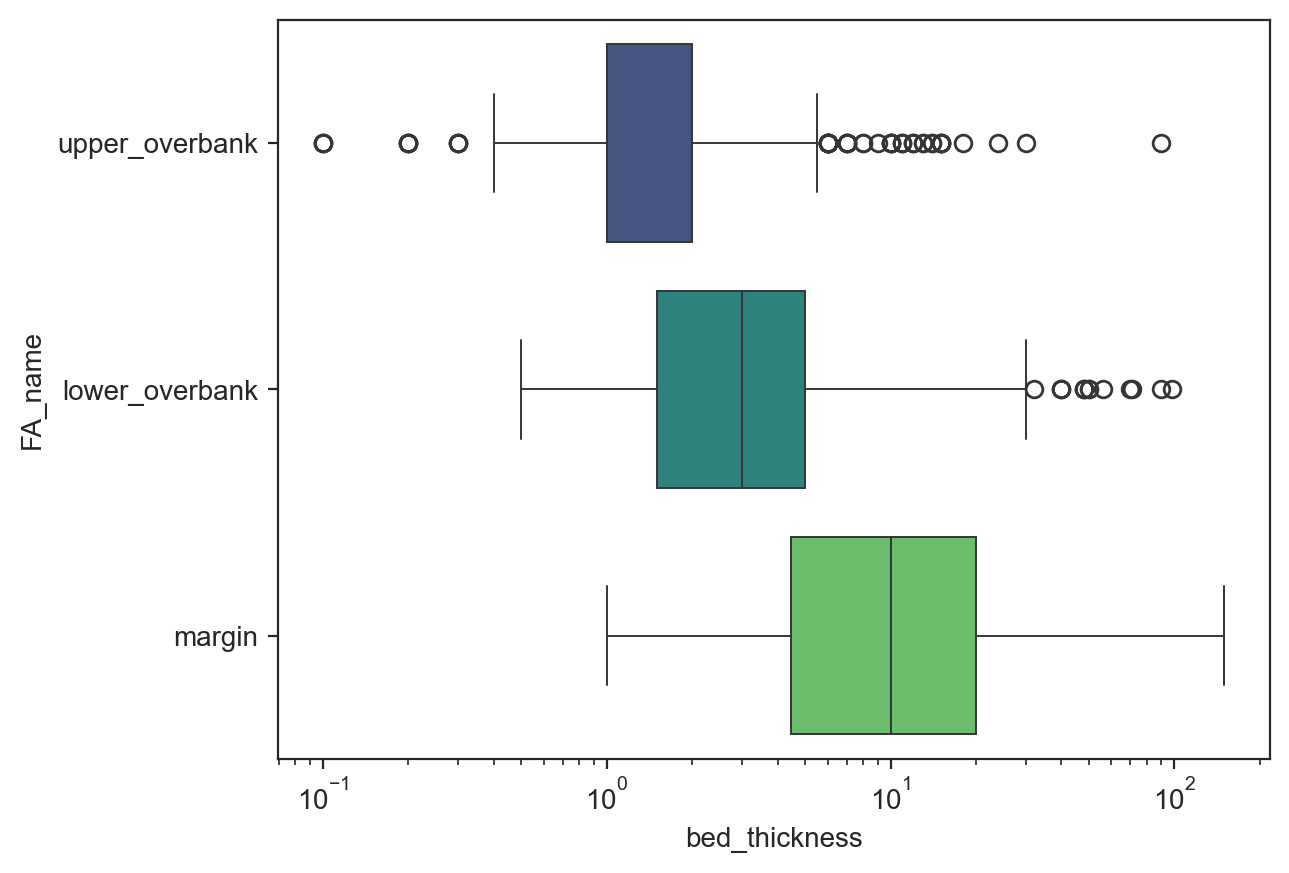

In [10]:
# Sandstone bed distribution
fig, ax = plt.subplots()
sns.boxplot(sand_th, x="bed_thickness", y="FA_name", ax=ax, palette='viridis', log_scale=True, linewidth=.7)
plt.show()

C:\Users\willi\AppData\Local\Temp\ipykernel_28548\2199977389.py:3: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `y` variable to `hue` and set `legend=False` for the same effect.

  sns.boxplot(overbank, x="event_th", y="FA_name", ax=ax, palette='viridis', log_scale=True, linewidth=.7)


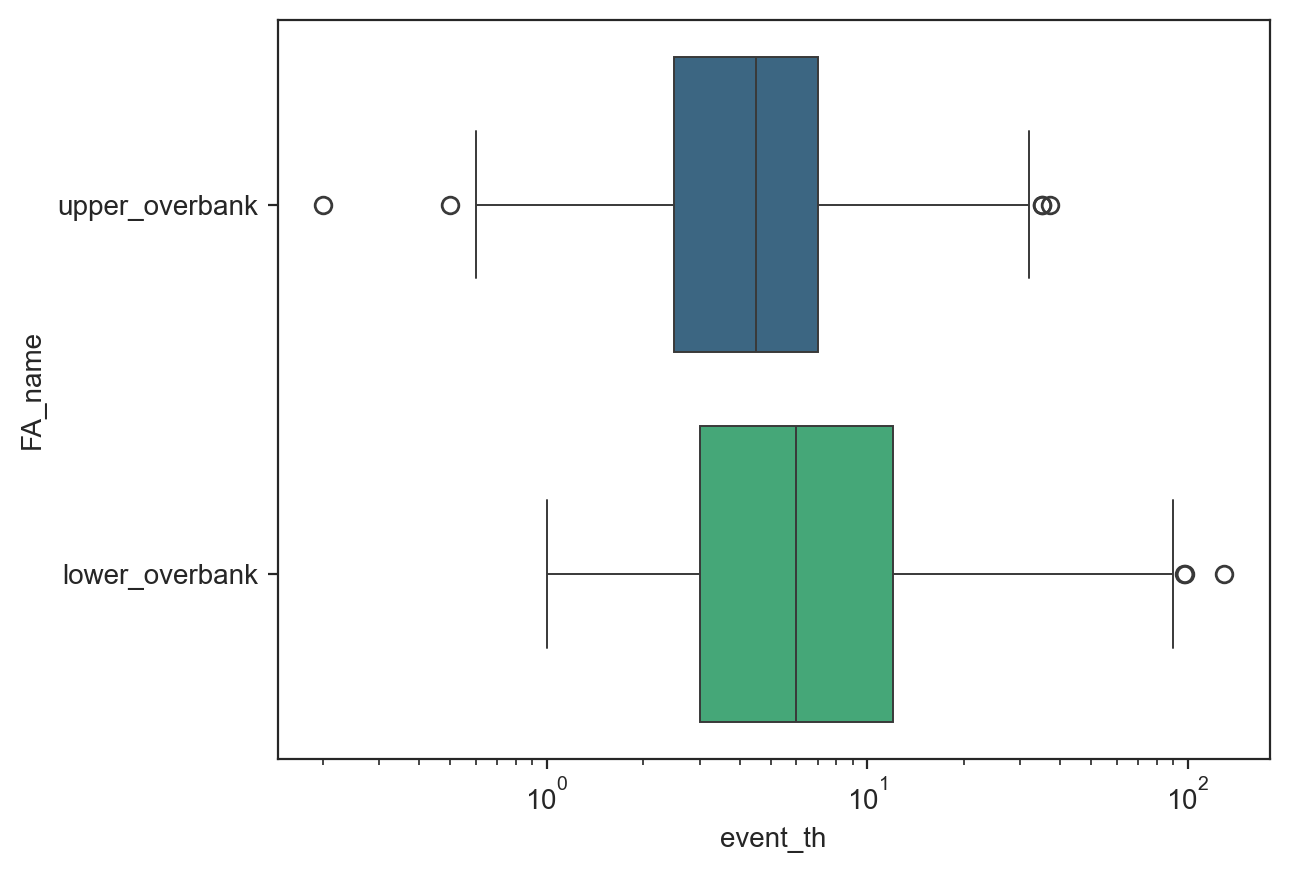

In [11]:
# Event bed distribution
fig, ax = plt.subplots()
sns.boxplot(overbank, x="event_th", y="FA_name", ax=ax, palette='viridis', log_scale=True, linewidth=.7)
plt.show()

C:\Users\willi\AppData\Local\Temp\ipykernel_28548\2061155621.py:22: UserWarning: FixedFormatter should only be used together with FixedLocator
  ax.set_yticklabels(labels)
The PostScript backend does not support transparency; partially transparent artists will be rendered opaque.


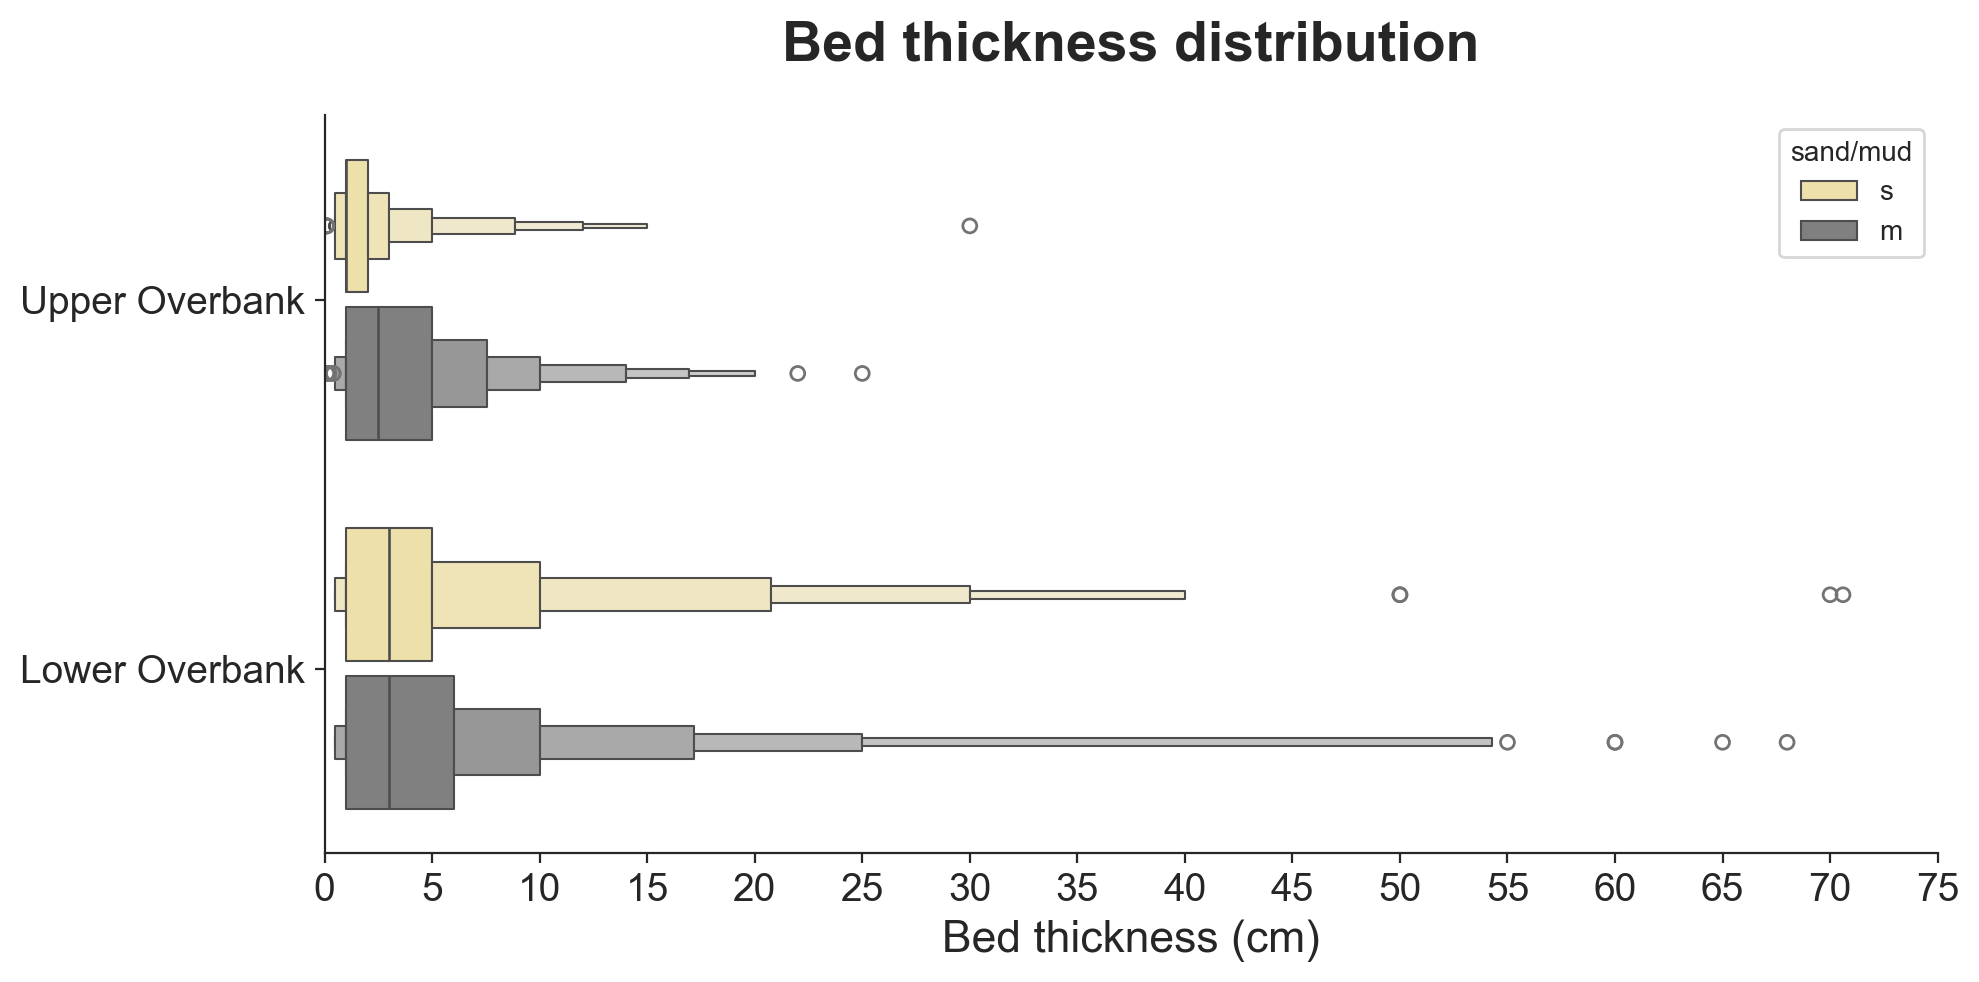

In [12]:
# All beds distribution - boxen plot 
fig, ax = plt.subplots(figsize=(10, 5))



sns.boxenplot(overbank, x="bed_thickness", y="FA_name", hue="sand/mud",
                 gap=.1, palette={"s": "#F9E79F", "m": ".5"})

for s in ["top", "right"]:
    ax.spines[s].set_visible(False)

labels = ['Upper Overbank', 'Lower Overbank']

# Change plot title and labels 
plt.xticks([0,5,10,15,20,25,30,35,40,45,50,55,60,65,70,75])
ax.set_title("Bed thickness distribution", size = 20, pad=20, fontdict={'fontweight':'bold'})
ax.set_ylabel(ylabel=None)
ax.set_xlabel("Bed thickness (cm)", size = 16)
ax.set_xlim(0,75)
# Modify tick and tick parameters
ax.tick_params(labelsize = 14) 
ax.set_yticklabels(labels) 


plt.tight_layout()

plt.savefig('figs/beds_distribution.eps', dpi=300)


plt.show()

NameError: name 'overbank_sand_beds' is not defined

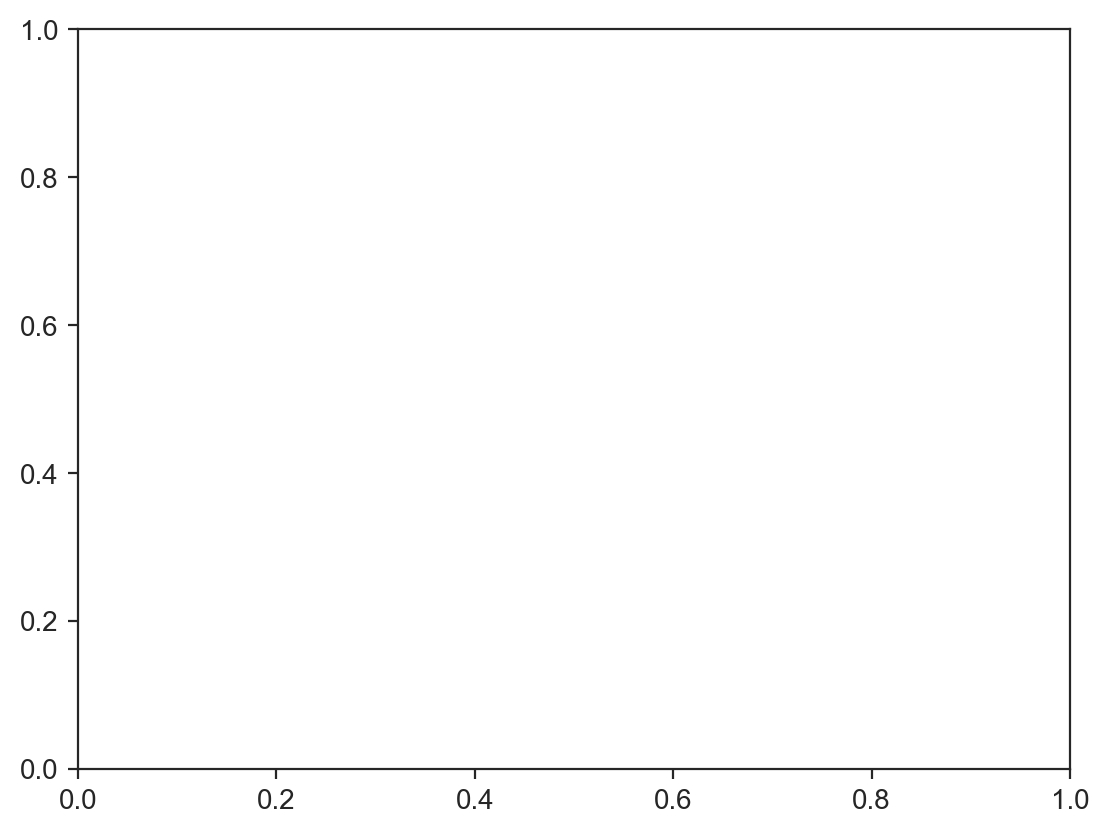

In [13]:
# Sandstone bed distribution 

fig, ax = plt.subplots()
sns.boxenplot(overbank_sand_beds, x="bed_thickness", y="FA_name", ax=ax, palette='viridis', linewidth=.7)
ax.set_xlim(-1,45)
plt.show()

In [ ]:
fig, ax = plt.subplots()
sns.boxenplot(overbank, x="event_th", y="FA_name", ax=ax, palette='viridis', linewidth=.7)
ax.set_xlim(0,80)


In [ ]:
fig, ax = plt.subplots(figsize=(7, 5))

sns.despine(fig)
sns.violinplot(overbank, x="bed_thickness", y="FA_name", log_scale=True, hue="sand/mud",
               inner="quart", split=True, gap=.1, bw_adjust=.7, palette={"s": "#F9E79F", "m": ".5"})
ax.xaxis.set_major_formatter(mpl.ticker.ScalarFormatter())
ax.set_xticks([0.1, 1, 10, 100])
plt.tight_layout()

In [ ]:
fig, ax = plt.subplots(figsize=(7, 5))

sns.kdeplot(df, x="sand_proportion", fill='stacked', hue="FA_name", common_norm=True)
plt.tight_layout()

In [ ]:
df.head()

In [ ]:
fig, ax = plt.subplots(figsize=(10, 5))

sns.violinplot(overbank_sand_beds, x="gs_base_num", y='FA_name', inner='stick', hue="FA_name")

for s in ["top", "right"]:
    ax.spines[s].set_visible(False)

y_labels = ['Upper Overbank', 'Lower Overbank']
x_labels = ['mud', 'vfsi', 'fsi', 'csi', 'vfs', 'fs', 'ms', 'cs', 'vcs', 'gr']

# Change plot title and labels 
ax.set_title("Grain-size distribution",  size = 20, pad=20, fontdict={'fontweight':'bold'})
ax.set_ylabel(ylabel=None)
ax.set_xlabel("Grain size", size = 16)
# Modify tick and tick parameters
ax.tick_params(labelsize = 14) 
ax.set_yticklabels(y_labels) 
ax.set_xticklabels(x_labels) 


plt.tight_layout()

plt.savefig('figs/g_size_distribution.eps', dpi=300)


In [ ]:
colors = ['#b4d3d4','#ecd9bc','#ff8080','#7d898b','#b46a75','#fee529']


fig = go.Figure(data=[go.Pie(labels=lower_overbank_sand_beds.gs_base_num,
                             values=lower_overbank_sand_beds.gs_base_num)])
fig.update_traces(hoverinfo='label+percent', textinfo='percent', texttemplate='%{percent:.1%}', textfont_size=25,
                  marker=dict(colors=colors, line=dict(color='#000000', width=1.5)))
fig.update_layout({
'plot_bgcolor': 'rgba(0, 0, 0, 0)',
'paper_bgcolor': 'rgba(0, 0, 0, 0)',
})

fig.show()

In [ ]:
colors = ['#b4d3d4','#ecd9bc','#ff8080','#7d898b','#b46a75','#fee529']

fig = go.Figure(data=[go.Pie(labels=upper_overbank_sand_beds.gs_base_num,
                             values=upper_overbank_sand_beds.gs_base_num)])
fig.update_traces(hoverinfo='label+percent', textinfo='percent', texttemplate='%{percent:.1%}', textfont_size=25,
                  marker=dict(colors=colors, line=dict(color='#000000', width=1.5)))
fig.update_layout({
'plot_bgcolor': 'rgba(0, 0, 0, 0)',
'paper_bgcolor': 'rgba(0, 0, 0, 0)',
})

fig.show()